In [4]:
import deepracer


In [5]:
import pandas as pd

In [6]:
import math
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
from deepracer.tracks import TrackIO, Track


In [21]:
from deepracer.tracks.track_utils import track_breakdown, track_meta

In [10]:
from deepracer.logs import SimulationLogsIO as sio, NewRewardUtils as nr, AnalysisUtils as au, PlottingUtils as pu, ActionBreakdownUtils as abu

In [23]:
import warnings
warnings.filterwarnings('ignore')

tu =TrackIO()
tu

In [27]:
for f in tu.get_tracks():
    print(f)

2022_may_open.npy


In [32]:
track: Track = tu.load_track("2022_may_open.npy")
track

cway = track.center_line

cway

Loaded 155 waypoints


array([[ 5.05151105,  0.86354104],
       [ 5.05148792,  1.16529298],
       [ 5.05144095,  1.467044  ],
       [ 5.05144405,  1.7687965 ],
       [ 5.05159903,  2.07055449],
       [ 5.05139589,  2.37230003],
       [ 5.05033636,  2.674016  ],
       [ 5.05182004,  2.97581899],
       [ 5.05801654,  3.27778149],
       [ 5.0473249 ,  3.5791626 ],
       [ 4.98865366,  3.87426209],
       [ 4.86766052,  4.15000546],
       [ 4.69657707,  4.39771652],
       [ 4.48732209,  4.61456966],
       [ 4.249699  ,  4.79995108],
       [ 3.9902761 ,  4.95355392],
       [ 3.71654308,  5.0800066 ],
       [ 3.43164539,  5.17895746],
       [ 3.13834643,  5.24928498],
       [ 2.84025156,  5.29496098],
       [ 2.539469  ,  5.31668305],
       [ 2.23781097,  5.32201195],
       [ 1.93603402,  5.32068348],
       [ 1.63428748,  5.32102394],
       [ 1.33253449,  5.32102203],
       [ 1.03078246,  5.32107902],
       [ 0.72903073,  5.32112098],
       [ 0.42727886,  5.32116318],
       [ 0.12552685,

In [68]:
def get_angle_diff(x1,y1,x2,y2):
    # Calculate the direction in radius, arctan2(dy, dx), 
    # the result is (-pi, pi) in radians between target and current vehicle position
    route_direction = math.atan2(y2 - y1, x2 - x1) 
    # Convert to degree
    route_direction = math.degrees(route_direction)
    return route_direction - 90

def check_straight_line(params, total_waypoints):
    waypoints = params['waypoints']
    waypoints_index1 = params['closest_waypoints'][0]
    waypoints_index2 = params['closest_waypoints'][1]

    # waypoint is stored as tuple of (x,y)
    w1 = waypoints[waypoints_index1] 
    w2 = waypoints[waypoints_index2]

    print("w1 ", w1)
    print("w2 ", w2)

    angle_diff = get_angle_diff(w1[0], w1[1], w2[0], w2[1])
    print('angle_diff ',angle_diff)
    return  angle_diff 

def run_test(index1, index2):
    params = {}
    params['waypoints'] = cway
    params['closest_waypoints'] = [index1, index2]
    check_straight_line(params, 2)


run_test(1, 10)




w1  [5.05148792 1.16529298]
w2  [4.98865366 3.87426209]
angle_diff  1.328731519332365


<Axes: >

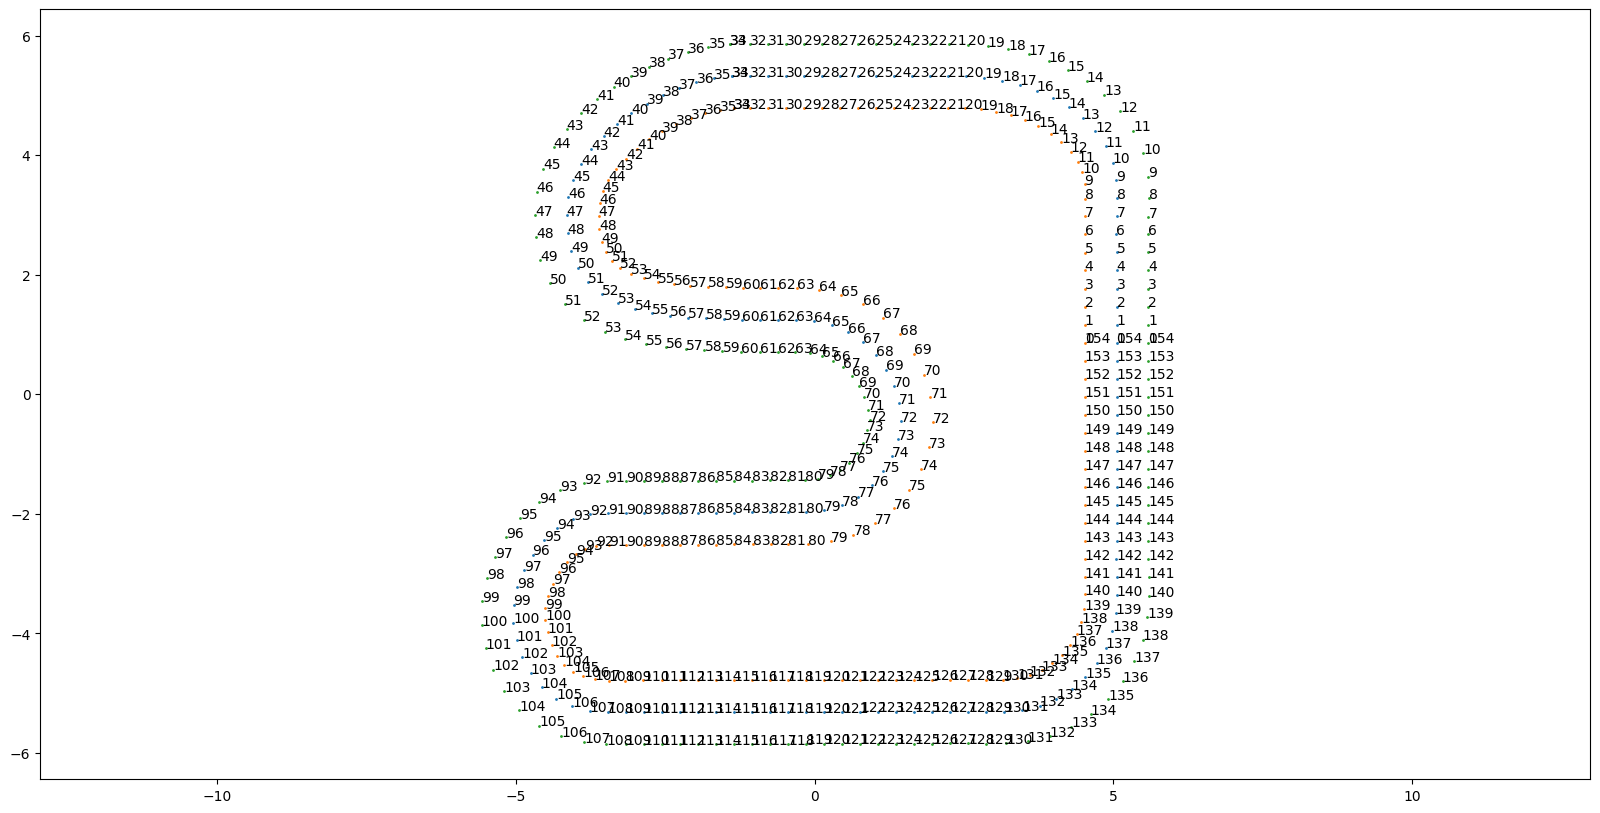

In [29]:
pu.plot_trackpoints(track)